In [1]:
from sklearn import *
from pandas import *
epl=read_csv('epl1819.csv')
epl.head()

C:\Python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Python36\lib\site-packages\sklearn\le

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [2]:
epls=epl[epl.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]]
epls.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11


In [3]:
ep=epls.drop(["Referee"],axis=1)
ep.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,8,13,6,4,11
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,4,1,11
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,6,9,9
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,1,4,9
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,15,15,2,5,11


In [4]:
from sklearn.preprocessing import LabelEncoder as lc
hom=lc()
aw=lc()
ep['hometeam']=hom.fit_transform(ep['HomeTeam'])
ep['awayteam']=aw.fit_transform(ep['AwayTeam'])
ep.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,hometeam,awayteam
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,8,13,6,4,11,13,10
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,12,10,4,1,11,1,4
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,15,10,6,9,9,8,6
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,6,13,1,4,9,9,5
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,15,15,2,5,11,14,16


In [5]:
eps=ep.drop(["Date","AwayTeam","HTR"],axis=1)
eps.head()

,HomeTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,hometeam,awayteam
0,Man United,2,1,H,1,0,8,13,6,4,11,13,10
1,Bournemouth,2,0,H,1,0,12,10,4,1,11,1,4
2,Fulham,0,2,A,0,1,15,10,6,9,9,8,6
3,Huddersfield,0,3,A,0,2,6,13,1,4,9,9,5
4,Newcastle,1,2,A,1,2,15,15,2,5,11,14,16


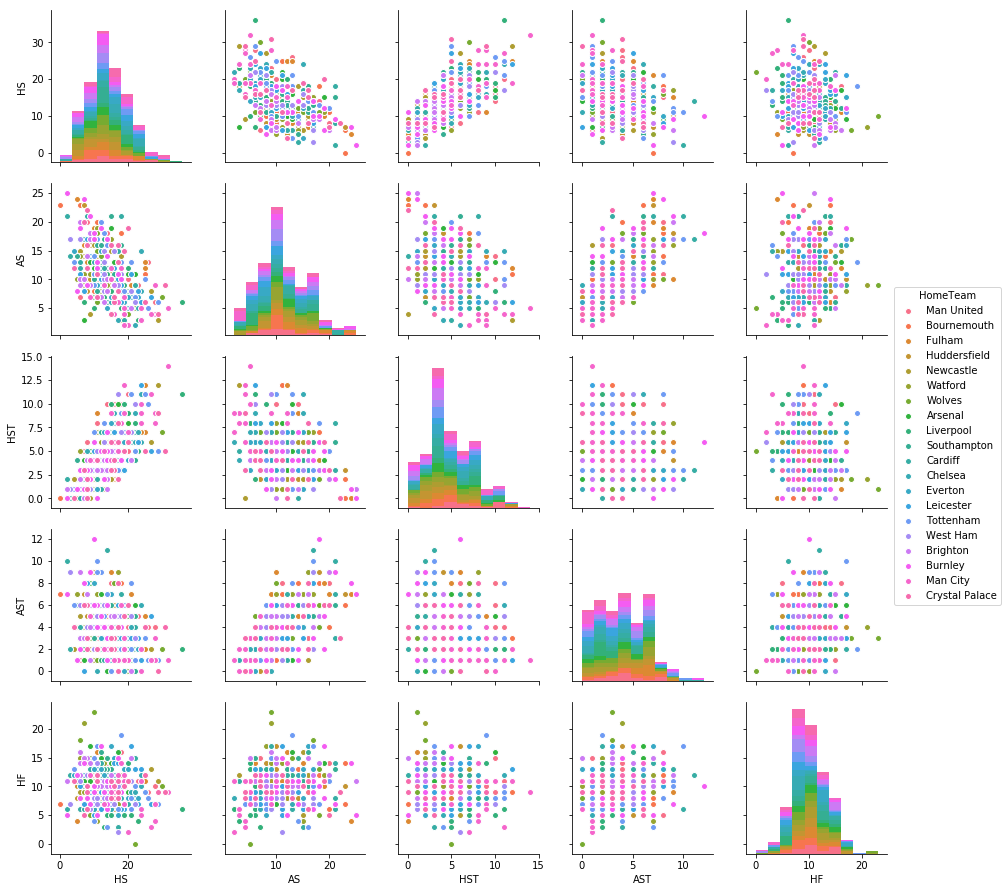

In [7]:
from seaborn import *
pose=["HomeTeam","HS","AS","HST","AST","HF"]
pairplot(eps[pose],hue="HomeTeam",diag_kind='kde')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'HS'),
 Text(0.5, 1.0, 'distribution of HS')]

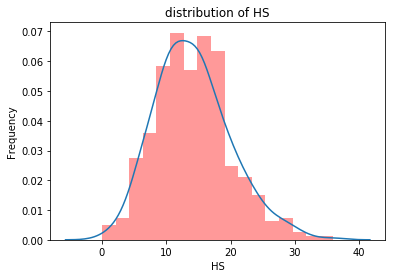

In [14]:
from numpy import *
dis=distplot(eps.HS,hist_kws={'linewidth':5,'color':'red'},kde=True)
dis.set(xlabel='HS',ylabel='Frequency',title='distribution of HS')

In [53]:
class outs(object):
  def __init__(self,data):
   self.data=data
  def rem(self):
    datas=array(self.data)
    fst=percentile(datas,75)
    sknd=percentile(datas,15)
    qr=(fst-sknd)
    qset=(sknd-qr,fst+qr)
    lst=[]
    for info in datas.tolist():
      if info>=qset[0] and info<=qset[1]:
        lst.append(info)
        return lst  
t=outs(eps['HS'])
t.rem()         
         

[8]

In [58]:
mean(eps['HS'])

14.134210526315789

In [69]:
from scipy.stats import *
class aut(object):
  def __init__(self,data):
     self.data=data
  def zrem(self):
    zed=zscore(self.data)
    out1=abs(zed)
    out2=(out1<3).all()
    return out2
zs=aut(eps['HS'])
eps['hs']=eps[zs.zrem()]
eps.head()  



,HomeTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,hometeam,awayteam,False,hs
0,Man United,2,1,H,1,0,8,13,6,4,11,13,10,8,8
1,Bournemouth,2,0,H,1,0,12,10,4,1,11,1,4,12,12
2,Fulham,0,2,A,0,1,15,10,6,9,9,8,6,15,15
3,Huddersfield,0,3,A,0,2,6,13,1,4,9,9,5,6,6
4,Newcastle,1,2,A,1,2,15,15,2,5,11,14,16,15,15


In [72]:
zp=aut(eps['HST'])
eps['hst']=eps[zp.zrem()]
eps.head() 

,HomeTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,hometeam,awayteam,False,hs,hst
0,Man United,2,1,H,1,0,8,13,6,4,11,13,10,8,8,8
1,Bournemouth,2,0,H,1,0,12,10,4,1,11,1,4,12,12,12
2,Fulham,0,2,A,0,1,15,10,6,9,9,8,6,15,15,15
3,Huddersfield,0,3,A,0,2,6,13,1,4,9,9,5,6,6,6
4,Newcastle,1,2,A,1,2,15,15,2,5,11,14,16,15,15,15


In [73]:
zs=aut(eps['AST'])
eps['ast']=eps[zs.zrem()]
eps.head() 

,HomeTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,hometeam,awayteam,False,hs,hst,ast
0,Man United,2,1,H,1,0,8,13,6,4,11,13,10,8,8,8,8
1,Bournemouth,2,0,H,1,0,12,10,4,1,11,1,4,12,12,12,12
2,Fulham,0,2,A,0,1,15,10,6,9,9,8,6,15,15,15,15
3,Huddersfield,0,3,A,0,2,6,13,1,4,9,9,5,6,6,6,6
4,Newcastle,1,2,A,1,2,15,15,2,5,11,14,16,15,15,15,15


In [80]:
zs=aut(eps['HF'])
eps['hf']=eps[zs.zrem()]
eps.head() 

,HomeTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,hometeam,awayteam,False,hs,hst,ast,hf
0,Man United,2,1,H,1,0,8,13,6,4,11,13,10,8,8,8,8,8
1,Bournemouth,2,0,H,1,0,12,10,4,1,11,1,4,12,12,12,12,12
2,Fulham,0,2,A,0,1,15,10,6,9,9,8,6,15,15,15,15,15
3,Huddersfield,0,3,A,0,2,6,13,1,4,9,9,5,6,6,6,6,6
4,Newcastle,1,2,A,1,2,15,15,2,5,11,14,16,15,15,15,15,15


In [81]:
chel=eps.drop(eps.columns[[0,1,2,4,5,6,8,9,10,13]],axis=1)
chel.head()

,FTR,AS,hometeam,awayteam,hs,hst,ast,hf
0,H,13,13,10,8,8,8,8
1,H,10,1,4,12,12,12,12
2,A,10,8,6,15,15,15,15
3,A,13,9,5,6,6,6,6
4,A,15,14,16,15,15,15,15


In [83]:
x=chel.iloc[:,[1,2,3,4,5,6,7]]
x.head()

,AS,hometeam,awayteam,hs,hst,ast,hf
0,13,13,10,8,8,8,8
1,10,1,4,12,12,12,12
2,10,8,6,15,15,15,15
3,13,9,5,6,6,6,6
4,15,14,16,15,15,15,15


In [122]:
x_=x.iloc[:,[3,4,5,6]]
y_=x["AS"]
y_.head()

0    13
1    10
2    10
3    13
4    15
Name: AS, dtype: int64

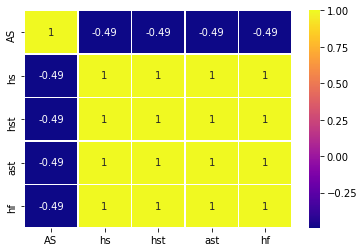

In [93]:
some=["AS","hs","hst","ast","hf"]
cor=chel[some].corr()
heatmap(cor,annot=True,linewidth=.5,cmap='plasma')

In [87]:
y=chel["FTR"]
y.head()

0    H
1    H
2    A
3    A
4    A
Name: FTR, dtype: object

In [123]:
from sklearn.model_selection import train_test_split as t
from sklearn.neighbors import KNeighborsClassifier as k
from sklearn.linear_model import LinearRegression as l
from matplotlib.pyplot import *
from plotly.express import *
xtrain,xtest,ytrain,ytest=t(x,y,test_size=.3)
x_train,x_test,y_train,y_test=t(x_,y_,test_size=.3)
err=[]
for i in range(1,30):
   mod1=k(n_neighbors=i)
   mod1.fit(xtrain,ytrain)
   pred=mod1.predict(xtest)
   er=mean(pred!= ytest)
   err.append(er)
fig=line(x=range(1,30),y=err)
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title=' kneighbors mean error')


In [125]:
from statsmodels.api import *
mod=OLS(y_train,x_train).fit()
print(mod.predict(x_test))
print(mod.summary())

17      4.917864
97      9.835727
357     1.229466
122     6.147330
92     12.909392
189     6.762062
293    11.679926
117     9.220994
267     7.376795
271    11.679926
105    13.524125
107     9.220994
214     9.220994
80      6.147330
177     5.532597
4       9.220994
225     6.762062
297    13.524125
0       4.917864
374     5.532597
171     6.147330
351     5.532597
243    14.138858
199     3.073665
337     7.991528
317    16.597790
333     9.220994
362    11.065193
16      3.688398
32     12.294659
         ...    
375     7.991528
216     6.762062
106     9.835727
165    10.450460
191     8.606261
5      11.679926
152     8.606261
86      7.991528
60      5.532597
255    12.294659
315     5.532597
379    10.450460
51      7.376795
266    17.827256
361    12.294659
179     6.147330
63      5.532597
79      9.220994
56      7.376795
103     8.606261
24      6.762062
174    10.450460
264     6.147330
292    11.065193
335     8.606261
156    12.294659
186     9.835727
377     6.1473

In [129]:
from pickle import *
fst=open('knns1.pkl','wb')
dump(mod1,fst)


In [131]:
sknd=open('ols.pkl','wb')
dump(mod,sknd)